# Smallest Mutiple

2520 is the smallest number that can be divided by each of the numbers from 1 to 10 without any remainder.

What is the smallest positive number that is evenly divisible by all of the numbers from 1 to 20?


## Solution One - Brute Force
The simplest way to 'solve' this problem is by iterating through every number until we find one that is divisible by all numbers from 1 to 20.

In [8]:
from utils.timing import timed


@timed(1)
def solution_one(upper_bound: int = 20) -> int:
    """
    finds the smallest number divisible by all number up until the upper bound specified
    
    :param upper_bound: upper bound of the divisors
    """
    
    def is_divisible(number: int) -> bool:
        """
        finds whether a number is divisible by all numbers up until the upper bound
        
        :param number: number
        """
        for i in range(1, upper_bound + 1):
            
            if number % i:
                return False
            
        return True
    
    number: int = 0
        
    while not is_divisible(number := number + 1):
        pass
    
    return number

answer, time = solution_one(20)
print(f'the answer is: {answer}')
print(f'that took: {time}s')

the answer is: 232792560
that took: 69.69478804399841s


### Solution One Discussion
Solution one is as bad as it gets. It has to check a lot of numbers and, on top of that, check if they are not divisible by any of the numbers that are smaller than the upper bound.

## Solution Two - Using Prime Factorization
A better approach to this problem would be to use the divisors to generate the number we want instead of brute-forcing it. To achieve that, we can use the following facts:

1. We can generate a number divisible by all numbers in a list by multiplying its elements.
2. If two numbers share common factors, we need to multiply the total by the factor to the highest number of occurrences in one number.

For example, we do the following if we wanted to get the smallest number divisible by 4, 20, 7, 8, and 3.

| number | factors |
| ------ | ------- |
| 4 | 2, 2 |
| 20 | 2, 2, 5 |
| 8 | 2, 2, 2 |
| 7 | 7 |
| 3 | 3 |

The most 2's a number has is 3; the most 3's a number has is 1; the most 5's a number has is 1; the most 7's a number has is 1. Therefore we know that the smallest number divisible by 4, 20, 7, 8, and 3 is given by:

$$ 2^3 \cdot 3^1 \cdot 5^1 \cdot 7^1 $$

In [9]:
from functools import reduce
from math import ceil, sqrt
from typing import Dict

from utils.timing import timed


@timed(1)
def solution_two(upper_bound: int = 20) -> int:
    """
    finds the smallest number divisible by all number up until the upper bound specified
    
    :param upper_bound: upper bound of the divisors
    """
    factors: Dict[int: int] = {}
        
    for i in range(2, upper_bound + 1):
        prime: bool = True
        j: int
        
        for j in range(2, ceil(sqrt(i)) + 1):
            occurrences: int = 0
            
            while not i % j:
                occurrences += 1
                prime = False
                i //= j
                
            if occurrences:
                
                if j in factors.keys():
                    factors[j] = occurrences if occurrences > factors[j] else factors[j]
                    
                else:
                    factors[j] = occurrences
        
        if prime and i not in factors.keys():
            factors[i] = 1
        
    return reduce(lambda a, b: a * b, (factor ** occurrences 
                                       for factor, occurrences in factors.items()))
    
    
answer, time = solution_two(20)
print(f'the answer is: {answer}')
print(f'that took: {time}s')

the answer is: 232792560
that took: 2.1349000235204585e-05s


### Solution Two Discussion
Solution 2 is a significant upgrade from the first one. Instead of checking at most $n!$ numbers and seeing if they are divisible, it only has to check $n$ numbers and get their prime factorization.

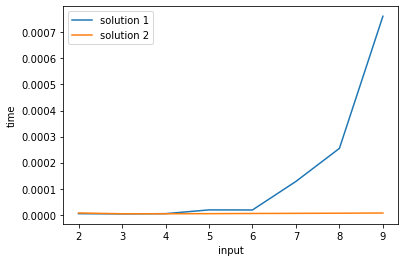

In [15]:
from utils.plotting import plot_range

params = tuple((i, ) for i in range(2, 10))
plot_range(params, (solution_one, solution_two))